# DynMod, Species Balance cases

#### Bernt Lie, University College of Southeast Norway

### Basic import and definitions

In [1]:
from OMPython import ModelicaSystem
import numpy as np
import numpy.random as nr
%matplotlib inline
%config InlineBackend.figure_formats={'svg',}  # use high quality SVG instead of PNGs
import matplotlib.pyplot as plt
import pandas as pd
LW1 = 2.5
LW2 = LW1/2
Cb1 = (0.3,0.3,1)
Cb2 = (0.7,0.7,1)
Cg1 = (0,0.6,0)
Cg2 = (0.5,0.8,0.5)
Cr1 = "Red"
Cr2 = (1,0.5,0.5)
LS1 = "solid"
LS2 = "dotted"
#### 
createPDF = False  # set to 'True' if you want to save plots as PDFs in addition
if createPDF:
    %mkdir figs
    figpath = "../figs/"
####
case = "SpeciesBalanceCases"
####
%mkdir $case # create a subfolder for this case
%cd $case

/home/dietmarw/.workspace/FM1015/SpeciesBalanceCases


### Liquid Mixing

#### Modelica code, file LiquidMixing

In [2]:
%%writefile LiquidMixing.mo
package LiquidMixing
  // Package for simulating liquid mixing
  // author: 	Bernt Lie
  //			University of Southeast Norway
  //			September 3, 2015
  //			May 11, 2017
  //
  model SimLiquidMixing
    // Simulation of liquid mixing
    // author: 	Bernt Lie
    //			University of Southeast Norway
    //			September 3, 2015
	//			May 11, 2017
	//
	// Instantiate model of *liquid mixing* (lm)
	ModLiquidMixing lm;
	// Declaring variables
	// -- inputs
	Real Vdi1 "Influent volumetric rate 1, L/s";
	Real Vdi2 "Influent volumetric rate 2, L/s";
	Real Vde "Effluent volumetric rate, L/s";
	Real rhoAi1 "Influent concentration of A in 1, kg/L";
	Real rhoBi1 "Influent concentration of B in 1, kg/L";
	Real rhoAi2 "Influent concentration of A in 2, kg/L";
	Real rhoBi2 "Influent concentration of B in 2, kg/L";
	// -- outputs
	output Real _h "Level in tank, dm";
	output Real _rhoA "Specific concentration of A in tank, kg/L";
	output Real _rhoB "Specific concentration of B in tank, kg/L";
  // Equations
  equation
    // -- input values
	Vdi1 = 1;
	Vdi2 = 1;
	Vde = if time < 100 then 2 else 2.1;
	rhoAi1 = 1;
	rhoBi1 = 0;
	rhoAi2 = 0;
	rhoBi2 = 0.8;
	// -- injecting input functions to model inputs
	lm.Vdi1 = Vdi1;
	lm.Vdi2 = Vdi2;
	lm.Vde = Vde;
	lm.rhoAi1 = rhoAi1;
	lm.rhoBi1 = rhoBi1;
	lm.rhoAi2 = rhoAi2;
	lm.rhoBi2 = rhoBi2;
	// -- outputs
	_h = lm.h;
	_rhoA = lm.rhoA;
	_rhoB = lm.rhoB;
  end SimLiquidMixing;
  //
  model ModLiquidMixing
    // Model of liquid mixing
    // author: 	Bernt Lie
    //			University of Southeast Norway
    //			September 3, 2015
	//			May 11, 2017
	//
	// Parameters
	parameter Real A = 25 "Cross sectional area of tank, dm2";
	parameter Real rhoA0 = 1 "Pure substance density of A, kg/L";
	parameter Real rhoB0 = 0.8 "Pure substance density of B, kg/L";
	// Initial state parameters
	parameter Real mA0 = 60 "Initial mass of species A, kg";
	parameter Real mB0 = 40 "Initial mass of species B, kg";
    // Declaring variables
	// -- states
	Real mA(start = mA0, fixed=true) "Mass of species A, kg";
	Real mB(start = mB0, fixed=true) "Mass of species B, kg";
	// -- auxiliary variables
	Real mdAi1 "Influent mass flow of A in flow 1, kg/s";
	Real mdBi1 "Influent mass flow of B in flow 1, kg/s";
	Real mdAi2 "Influent mass flow of A in flow 2, kg/s";
	Real mdBi2 "Influent mass flow of B in flow 2, kg/s";
	Real mdAe "Effluent mass flow of B, kg/s";
	Real mdBe "Effluent mass flow of B, kg/s";
	Real rhoA "Specific concentration of A, kg/L";
	Real rhoB "Specific concentration of B, kg/L";
	Real V "Tank liquid volume, L";
	Real VA0 "Partial volume of species A, L";
	Real VB0 "Partial volume of species B, L";
	Real h "Tank liquid level, dm";
	// -- input variables
    input Real Vdi1, Vdi2, Vde, rhoAi1, rhoBi1, rhoAi2, rhoBi2;
  // Equations constituting the model
  equation
	// Algebraic equations
	mdAi1 = rhoAi1*Vdi1;
	mdBi1 = rhoBi1*Vdi1;
	mdAi2 = rhoAi2*Vdi2;
	mdBi2 = rhoBi2*Vdi2;
	mdAe = rhoA*Vde;
	mdBe = rhoB*Vde;
	rhoA = mA/V;
	rhoB = mB/V;
	V = VA0 + VB0;
	VA0 = mA/rhoA0;
	VB0 = mB/rhoB0;
	V = A*h;
    // Differential equations
	der(mA) = mdAi1 + mdAi2 - mdAe;
	der(mB) = mdBi1 + mdBi2 - mdBe;
  end ModLiquidMixing;
  // End package
end LiquidMixing;

Writing LiquidMixing.mo


#### Instantiating model from SimLiquidMixing

In [3]:
tnk = ModelicaSystem("LiquidMixing.mo","LiquidMixing.SimLiquidMixing")

2017-08-09 10:59:19,266 - OMPython - INFO - OMC Server is up and running at file:////tmp/openmodelica.dietmarw.port.39512711d41b463686559095fb0fe090


In [4]:
tnk.setSimulationOptions(stopTime=300,stepSize=2)
tnk.simulate()
tm,h,rhoA,rhoB = tnk.getSolutions("time","_h","_rhoA","_rhoB")

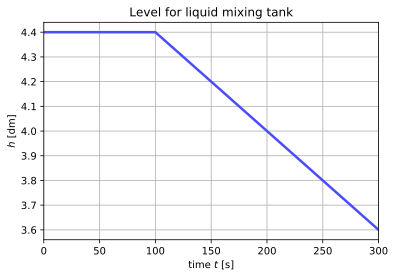

In [5]:
plt.plot(tm,h,linewidth=LW1,color=Cb1,label=r"$h$")
plt.title(r"Level for liquid mixing tank")
plt.xlabel(r"time $t$ [s]")
plt.ylabel(r"$h$ [dm]")
plt.grid()
plt.xlim(0,300)
if createPDF:
    figfile = "liqMixingSim-1.pdf"
    plt.savefig(figpath+figfile)

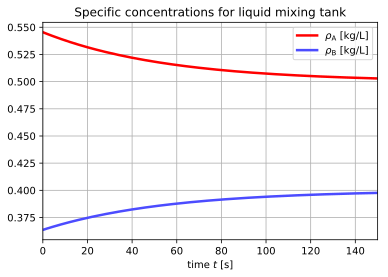

In [6]:
plt.plot(tm,rhoA,linewidth=LW1,color=Cr1,label=r"$\rho_{\mathrm{A}}$ [kg/L]")
plt.plot(tm,rhoB,linewidth=LW1,color=Cb1,label=r"$\rho_{\mathrm{B}}$ [kg/L]")
plt.title(r"Specific concentrations for liquid mixing tank")
plt.xlabel(r"time $t$ [s]")
plt.grid()
plt.xlim(0,150)
plt.legend()
if createPDF:
    figfile = "liqMixingSim-2.pdf"
    plt.savefig(figpath+figfile)

### Liquid phase, varying volume reactor

#### Modelica code, file VaryingVReactor

In [7]:
%%writefile VaryingVReactor.mo
package VaryingVReactor
  // Package for simulating liquid reactor with varying volume
  // author: 	Bernt Lie
  //			University of Southeast Norway
  //			September 9, 2015
  //			May 11, 2017
  //
  model SimVaryingVReactor
    // Simulation of liquid mixing with varying volume
    // author: 	Bernt Lie
    //			University of Southeast Norway
    //			September 9, 2015
	//			May 11, 2017
	//
	// Instantiate model of *varying volume reactor* (vvr)
	ModVaryingVReactor vvr;
	// Declaring variables
	// -- inputs
	Real Vdi "Influent volumetric rate, L/s";
	Real cAi "Influent concentration of A, mol/L";
	// -- outputs
	output Real _h "Level in tank, dm";
	output Real _cA "Molar concentration of A in tank, mol/L";
	output Real _cB "Molar concentration of B in tank, mol/L";
  // Equations
  equation
    // -- input values
	Vdi = if time < 5 then 2 else 2.5;
	// Vde = if time < 100 then 2 else 2.1;
	cAi = if time < 10 then 3 else 2;
	// -- injecting input functions to model inputs
	vvr.Vdi = Vdi;
	vvr.cAi = cAi;
	// -- outputs
	_h = vvr.h;
	_cA = vvr.cA;
	_cB = vvr.cB;
  end SimVaryingVReactor;
  //
  model SimBatchReactor
    // Simulation of liquid mixing with varying volume
    // author: 	Bernt Lie
    //			University of Southeast Norway
    //			September 9, 2015
	//			May 11, 2017
	//
	// Instantiate model of *varying volume reactor* (vvr)
	ModVaryingVReactor vvr(K=0);
	// Declaring variables
	// -- inputs
	Real Vdi "Influent volumetric rate, L/s";
	Real cAi "Influent concentration of A, mol/L";
	// -- outputs
	output Real _h "Level in tank, dm";
	output Real _cA "Molar concentration of A in tank, mol/L";
	output Real _cB "Molar concentration of B in tank, mol/L";
  // Equations
  equation
    // -- input values
	Vdi = 0;
	// Vde = if time < 100 then 2 else 2.1;
	cAi = if time < 10 then 3 else 2;
	// -- injecting input functions to model inputs
	vvr.Vdi = Vdi;
	vvr.cAi = cAi;
	// -- outputs
	_h = vvr.h;
	_cA = vvr.cA;
	_cB = vvr.cB;
  end SimBatchReactor;
  //
  model ModVaryingVReactor
    // Model of liquid reactor
    // author: 	Bernt Lie
    //			University of Southeast Norway
    //			September 9, 2015
	//			May 11, 2017
	//
	// Parameters
	parameter Real rho = 1 "Liquid density, kg/L";
	parameter Real A = 5 "Cross sectional area of tank, dm2";
	parameter Real K = 5 "Valve constant, kg/s";
	parameter Real h_s = 3 "Level scaling, dm";
	parameter Real a = 2 "Stoichiometric constant, -";
	parameter Real k = 0.1 "Reaction constant, (mol/L)^(1-a)/s";
	parameter Real[2] nu = {-a, 1} "Stoichiometric matrix";
	// Initial state parameters
	parameter Real h0 = 1.5 "Initial liquid level, dm";
	parameter Real m0 = rho*h0*A "Initial liquid mass, kg";
	parameter Real nA0 = 2 "Initial number of moles, species A; mol";
	parameter Real nB0 = 0 "Initial number of moles, species B; mol";
    // Declaring variables
	// -- states
	Real m(start = m0, fixed = true) "Liquid mass, kg";
	Real nA(start = nA0, fixed = true) "Number of moles of species A, mol";
	Real nB(start = nB0, fixed = true) "Number of moles of species B, mol";
	// -- auxiliary variables
	Real V "Liquid volume, L";
	Real h "Liquid level, dm";
	Real mdi "Influent mass flow rate, kg/s";
	Real mde "Effluent mass flow rate, kg/s";
	Real cA "Molar concentration of species A, mol/L";
	Real cB "Molar concentration of species B, mol/L";
	Real ndAi "Influent molar flow rate of species A, mol/s";
	Real ndBi "Influent molar flow rate of species B, mol/s";
	Real ndAe "Effluent molar flow rate of species A, mol/s";
	Real ndBe "Effluent molar flow rate of species B, mol/s";
	Real Vde "Effluent volumetric flow rate, L/s";
	Real ndAg "Molar rate of generation of species A, mol/s";
	Real ndBg "Molar rate of generation of species B, mol/s";
	Real rAg "Generation rate of species A, mol/(L.s)";
	Real rBg "Generation rate of species B, mol/(L.s)";
	Real r "Reaction rate, mol/(L.s)";
	// -- input variables
    input Real Vdi "Influent volumetric flow rate, L/s";
	input Real cAi "Influent concentration of species A, mol/L";
  // Equations constituting the model
  equation
	// Differential equations
	der(m) = mdi - mde;
	der(nA) = ndAi - ndAe + ndAg;
	der(nB) = ndBi - ndBe + ndBg;
	// Algebraic equations
	m = rho*V;
	V = A*h;
	mdi = rho*Vdi;
	mde = K*sqrt(h/h_s);
	nA = cA*V;
	nB = cB*V;
	ndAi = cAi*Vdi;
	ndBi = 0;
	ndAe = cA*Vde;
	ndBe = cB*Vde;
	Vde = mde/rho;
	ndAg = rAg*V;
	ndBg = rBg*V;
	rAg = nu[1]*r;
	rBg = nu[2]*r;
	r = k*cA^a;
  end ModVaryingVReactor;
  // End package
end VaryingVReactor;

Writing VaryingVReactor.mo


#### Instantiating model from SimVaryingVReactor

In [8]:
rL = ModelicaSystem("VaryingVReactor.mo","VaryingVReactor.SimVaryingVReactor")

2017-08-09 10:59:23,205 - OMPython - INFO - OMC Server is up and running at file:////tmp/openmodelica.dietmarw.port.885f23f639954f4d832db95ba53c426d


In [9]:
rL.setSimulationOptions(stopTime=15,stepSize=0.1)
rL.simulate()
tm,h,cA,cB,Vdi,cAi = rL.getSolutions("time","_h","_cA","_cB","Vdi","cAi")

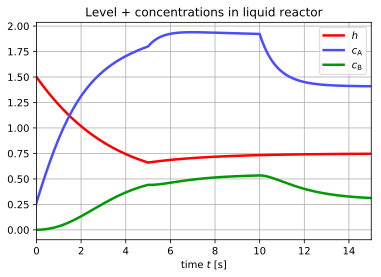

In [10]:
plt.plot(tm,h,linewidth=LW1,color=Cr1,label=r"$h$")
plt.plot(tm,cA,linewidth=LW1,color=Cb1,label=r"$c_{\mathrm{A}}$")
plt.plot(tm,cB,linewidth=LW1,color=Cg1,label=r"$c_{\mathrm{B}}$")
plt.title(r"Level + concentrations in liquid reactor")
plt.xlabel(r"time $t$ [s]")
plt.grid()
plt.xlim(0,15)
plt.legend()
if createPDF:
    figfile = "liqReactorSim-1.pdf"
    plt.savefig(figpath+figfile)

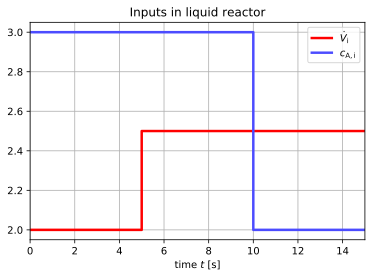

In [11]:
plt.plot(tm,Vdi,linewidth=LW1,color=Cr1,label=r"$\dot{V}_{\mathrm{i}}$")
plt.plot(tm,cAi,linewidth=LW1,color=Cb1,label=r"$c_{\mathrm{A,i}}$")
plt.title(r"Inputs in liquid reactor")
plt.xlabel(r"time $t$ [s]")
plt.grid()
plt.xlim(0,15)
plt.legend()
if createPDF:
    figfile = "liqReactorSim-2.pdf"
    plt.savefig(figpath+figfile)

### Liquid phase, batch reactor

In [12]:
rL = ModelicaSystem("VaryingVReactor.mo","VaryingVReactor.SimBatchReactor")

2017-08-09 10:59:26,342 - OMPython - INFO - OMC Server is up and running at file:////tmp/openmodelica.dietmarw.port.0915eb859c5547dea78dbc878f4a9a6d


In [13]:
rL.setSimulationOptions(stopTime=15,stepSize=0.1)
rL.simulate()
tm,cA,cB = rL.getSolutions("time","_cA","_cB")

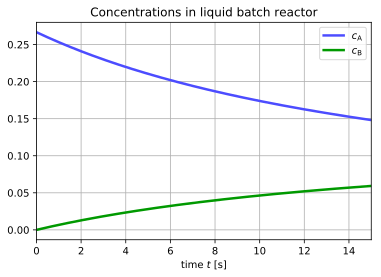

In [14]:
plt.plot(tm,cA,linewidth=LW1,color=Cb1,label=r"$c_{\mathrm{A}}$")
plt.plot(tm,cB,linewidth=LW1,color=Cg1,label=r"$c_{\mathrm{B}}$")
plt.title(r"Concentrations in liquid batch reactor")
plt.xlabel(r"time $t$ [s]")
plt.grid()
plt.xlim(0,15)
plt.legend()
if createPDF:
    figfile = "liqReactorSim-3.pdf"
    plt.savefig(figpath+figfile)

### Liquid phase, fixed volume

#### Modelica code, file FixedVReactor

In [15]:
%%writefile FixedVReactor.mo
package FixedVReactor
  // Package for simulating liquid reactor with fixed volume
  // author: 	Bernt Lie
  //			University of Southeast Norway
  //			September 10, 2015
  //			May 11, 2017
  //
  model SimFixedVReactor
    // Simulation of liquid mixing with fixed volume
    // author: 	Bernt Lie
    //			University of Southeast Norway
    //			September 10, 2015
	//			May 11, 2017
	//
	// Instantiate model of *fixed volume reactor* (fvr)
	ModFixedVReactor fvr;
	// Declaring variables
	// -- inputs
	Real Vd "Volumetric rate, L/s";
	Real cAi "Influent concentration of A, mol/L";
	// -- outputs
	output Real _cA "Molar concentration of A in tank, mol/L";
	output Real _cB "Molar concentration of B in tank, mol/L";
  // Equations
  equation
    // -- input values
	Vd = if time < 5 then 2 else 2.5;
	// Vde = if time < 100 then 2 else 2.1;
	cAi = if time < 10 then 3 else 2;
	// -- injecting input functions to model inputs
	fvr.Vd = Vd;
	fvr.cAi = cAi;
	// -- outputs
	_cA = fvr.cA;
	_cB = fvr.cB;
  end SimFixedVReactor;
  //
  model ModFixedVReactor
    // Model of liquid reactor
    // author: 	Bernt Lie
    //			University of Southeast Norway
    //			September 10, 2015
	//			May 11, 2017
	//
	// Parameters
	parameter Real V = 15 "Reactor volume, L";
	parameter Real a = 2 "Stoichiometric constant, -";
	parameter Real k = 0.1 "Reaction constant, (mol/L)^(1-a)/s";
	parameter Real[2] nu = {-a, 1} "Stoichiometric matrix";
	// Initial state parameters
	parameter Real nA0 = 2 "Initial number of moles, species A; mol";
	parameter Real nB0 = 0 "Initial number of moles, species B; mol";
    // Declaring variables
	// -- states
	Real nA(start = nA0, fixed = true) "Number of moles of species A, mol";
	Real nB(start = nB0, fixed = true) "Number of moles of species B, mol";
	// -- auxiliary variables
	Real cA "Molar concentration of species A, mol/L";
	Real cB "Molar concentration of species B, mol/L";
	Real ndAi "Influent molar flow rate of species A, mol/s";
	Real ndBi "Influent molar flow rate of species B, mol/s";
	Real ndAe "Effluent molar flow rate of species A, mol/s";
	Real ndBe "Effluent molar flow rate of species B, mol/s";
	Real ndAg "Molar rate of generation of species A, mol/s";
	Real ndBg "Molar rate of generation of species B, mol/s";
	Real rAg "Generation rate of species A, mol/(L.s)";
	Real rBg "Generation rate of species B, mol/(L.s)";
	Real r "Reaction rate, mol/(L.s)";
	// -- input variables
    input Real Vd "Volumetric flow rate, L/s";
	input Real cAi "Influent concentration of species A, mol/L";
  // Equations constituting the model
  equation
	// Differential equations
	der(nA) = ndAi - ndAe + ndAg;
	der(nB) = ndBi - ndBe + ndBg;
	// Algebraic equations
	nA = cA*V;
	nB = cB*V;
	ndAi = cAi*Vd;
	ndBi = 0;
	ndAe = cA*Vd;
	ndBe = cB*Vd;
	ndAg = rAg*V;
	ndBg = rBg*V;
	rAg = nu[1]*r;
	rBg = nu[2]*r;
	r = k*cA^a;
  end ModFixedVReactor;
  // End package
end FixedVReactor;

Writing FixedVReactor.mo


#### Instantiating model from SimFixedVReactor

In [16]:
rL = ModelicaSystem("FixedVReactor.mo","FixedVReactor.SimFixedVReactor")

2017-08-09 10:59:29,171 - OMPython - INFO - OMC Server is up and running at file:////tmp/openmodelica.dietmarw.port.66b58440246e4fb3845d9870e6331397


In [17]:
rL.setSimulationOptions(stopTime=15,stepSize=0.1)
rL.simulate()
tm,cA,cB,Vd,cAi = rL.getSolutions("time","_cA","_cB","Vd","cAi")

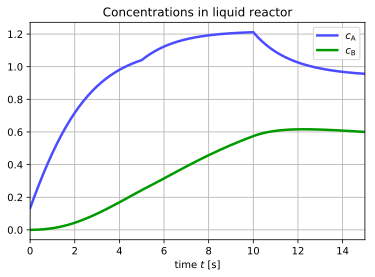

In [18]:
plt.plot(tm,cA,linewidth=LW1,color=Cb1,label=r"$c_{\mathrm{A}}$")
plt.plot(tm,cB,linewidth=LW1,color=Cg1,label=r"$c_{\mathrm{B}}$")
plt.title(r"Concentrations in liquid reactor")
plt.xlabel(r"time $t$ [s]")
plt.grid()
plt.xlim(0,15)
plt.legend()
if createPDF:
    figfile = "fixedVReactorSim-1.pdf"
    plt.savefig(figpath+figfile)

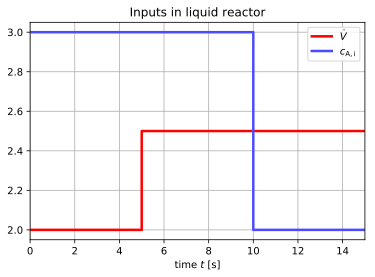

In [19]:
plt.plot(tm,Vd,linewidth=LW1,color=Cr1,label=r"$\dot{V}}$")
plt.plot(tm,cAi,linewidth=LW1,color=Cb1,label=r"$c_{\mathrm{A,i}}$")
plt.title(r"Inputs in liquid reactor")
plt.xlabel(r"time $t$ [s]")
plt.grid()
plt.xlim(0,15)
plt.legend()
if createPDF:
    figfile = "fixedVReactorSim-2.pdf"
    plt.savefig(figpath+figfile)

### Gas reactor, pressures

#### Modelica code, file GasReactor

In [20]:
%%writefile GasReactor.mo
package GasReactor
  // Package for simulating gas reactor
  // author: 	Bernt Lie
  //			University of Southeast Norway
  //			September 11, 2015
  //			May 11, 2017
  //
  model SimGasReactor
    // Simulation of gas reactor
    // author: 	Bernt Lie
    //			University of Southeast Norway
    //			September 11, 2015
	//			May 11, 2017
	//
	// Instantiate model of *gas reactor* (gr)
	ModGasReactor gr;
	// Declaring variables
	// -- inputs
	Real _pi "Influent pressure (pure A), Pa";
	// -- outputs
	output Real _pA "Partial pressure of A in reactor, Pa";
	output Real _pB "Partial pressure of B in reactor, Pa";
	output Real _p "Total pressure in reactor, Pa";
  // Equations
  equation
    // -- input values
	_pi = if time < 8 then 10*gr.pa else 5*gr.pa;
	// -- injecting input functions to model inputs
	gr.pi = _pi;
	// -- outputs
	_pA = gr.pA;
	_pB = gr.pB;
	_p = gr.p;
  end SimGasReactor;
  //
  model ModGasReactor
    // Model of gas reactor
    // author: 	Bernt Lie
    //			University of Southeast Norway
    //			September 11, 2015
	//			May 11, 2017
	//
	// Parameters
	parameter Real V = 15e-3 "Reactor volume, L";
	parameter Real R = 8.31 "Gas constant, J/(kmol.K)";
	parameter Real T = 300 "Temperature in classroom, K";
	parameter Real Ki = 5e-4 "Influent valve constant, mol/s";
	parameter Real pa = 1.01e5 "Atmospheric pressure, Pa";
	parameter Real Ke = 5e-4 "Effluent valve constant, mol/s";
	parameter Real a = 2 "Stoichiometric constant, -";
	parameter Real[2] nu = {-a,1} "Stoichiometric matrix,-";
	parameter Real k = 1e-9 "Reaction constant, (mol/L)/(Pa^a.s)";
	// Initial state parameters
	parameter Real nA0 = 3 "Initial amount of species A, mol";
	parameter Real nB0 = 0 "Initial amount of species B, mol";
    // Declaring variables
	// -- states
	Real nA(start = nA0) "Amount of species A in volume, mol";
	Real nB(start = nB0) "Amount of species B in volume, mol";
	// -- auxiliary variables
	Real pA "Partial pressure of species A, Pa";
	Real pB "Partial pressure of species B, Pa";
	Real p "Pressure in reactor, Pa";
	Real Vdi "Influent volumetric flow rate, m3/s";
	Real dpi "Influent valve pressure drop, Pa";
	Real ndAi "Influent molar flow rate of A, mol/s";
	Real ndBi "Influent molar flow rate of B, mol/s";
	Real Vde "Effluent voumetric flow rate, m3/2";
	Real dpe "Effluent valve pressure drop, Pa";
	Real ndAe "Effluent molar flow rate of A, mol/s";
	Real ndBe "Effluent molar flow rate of B, mol/s";
	Real ndAg "Molar rate of generation of A, mol/s";
	Real rAg "Generation rate of A, mol/(L.s)";
	Real ndBg "Molar rate of generation of B, mol/s";
	Real rBg "Generation rate of B, mol/(L.s)";
	Real r "Rate of reaction, mol/(L.s)";
	// -- input variables
    input Real pi "Influent pressure (pure A), Pa";
  // Equations constituting the model
  equation
	// Differential equations
	der(nA) = ndAi - ndAe + ndAg;
	der(nB) = ndBi - ndBe + ndBg;
	// Algebraic equations
	pA*V = nA*R*T;
	pB*V = nB*R*T;
	p = pA + pB;
	Vdi = Ki*sqrt(dpi/pa);
	dpi = pi - p;
	pi*Vdi = ndAi*R*T;
	ndBi = 0;
	Vde = Ke*sqrt(dpe/pa);
	dpe = p - pa;
	pA*Vde = ndAe*R*T;
	pB*Vde = ndBe*R*T;
	ndAg = rAg*V;
	ndBg = rBg*V;
	rAg = nu[1]*r;
	rBg = nu[2]*r;
	r = k*pA^a;
  end ModGasReactor;
  // End package
end GasReactor;

Writing GasReactor.mo


#### Instantiating model from SimGasReactor

In [21]:
rG = ModelicaSystem("GasReactor.mo","GasReactor.SimGasReactor")

2017-08-09 10:59:32,330 - OMPython - INFO - OMC Server is up and running at file:////tmp/openmodelica.dietmarw.port.2804f9361df242e88e2c274f18ee33fc


Expected end of text (at char 111), (line:2, col:44)


In [22]:
rG.setSimulationOptions(stopTime=20,stepSize=0.1)
rG.simulate()
tm, pA, pB, p, pi = rG.getSolutions("time","_pA","_pB","_p","_pi")

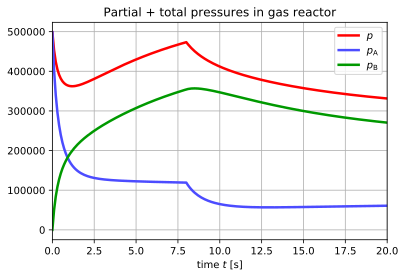

In [23]:
plt.plot(tm,p,linewidth=LW1,color=Cr1,label=r"$p$")
plt.plot(tm,pA,linewidth=LW1,color=Cb1,label=r"$p_{\mathrm{A}}$")
plt.plot(tm,pB,linewidth=LW1,color=Cg1,label=r"$p_{\mathrm{B}}$")
plt.title(r"Partial + total pressures in gas reactor")
plt.xlabel(r"time $t$ [s]")
plt.grid()
plt.xlim(0,20)
plt.legend()
if createPDF:
    figfile = "gasReactorSim-1.pdf"
    plt.savefig(figpath+figfile)

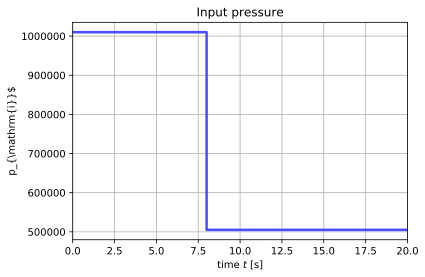

In [24]:
plt.plot(tm,pi,linewidth=LW1,color=Cb1,label=r"$p_{\mathrm{i}}$")
plt.title(r"Input pressure")
plt.xlabel(r"time $t$ [s]")
plt.ylabel(r"p_{\mathrm{i}}$")
plt.grid()
plt.xlim(0,20)
if createPDF:
    figfile = "gasReactorSim-2.pdf"
    plt.savefig(figpath+figfile)

### Gas diffusion in liquid pipe

#### Modelica code, file DiffusionGasLiquid

In [25]:
%%writefile DiffusionGasLiquid.mo
package DiffusionGasLiquid
  // Package for simulating diffusion of gas in liquid pipe
  // author:    Bernt Lie
  //            University of Southeast Norway
  //            September 14, 2015
  //			May 11, 2017
  //
  model SimCompareDiffusionGasLiquid
     // Simulation and comparison of Diffusion of Gas in Liquid model
     // author: Bernt Lie
     //         University of Southeast Norway
     //         September 14, 2015
     //			May 11, 2017
     //
     // Instantiate model
     ModDiffusionGasLiquid dgl10(N=10), dgl30(N=30), dgl90(N=90), dgl300(N=300);
     ModDiffusionGasLiquid dglD1(D=0.01e-5), dglD3e3(D=3e3*0.01e-5);
     // Declaring variables
     // -- inputs
     Real _Vdi "Influent volumetric flow rate of mixture, L/s";
     Real _rhoi "Influent gas concentration, kg/L";
     // -- outputs
     output Real _rhoL10, _rhoL30, _rhoL90, _rhoL300;
     output Real _rhoLD1, _rhoLD3e3;
  // Equations
  equation
  // -- setting input values
     _Vdi = if time < 10000 then 1e-2 else 0.3e-2;
     _rhoi = if time < 15000 then 10e-3 else 7e-3;
     // -- injecting inputs to underlying model
     dgl10.Vdi = _Vdi;
     dgl30.Vdi = _Vdi;
     dgl90.Vdi = _Vdi;
     dgl300.Vdi = _Vdi;
     dgl10.rhoi = _rhoi;
     dgl30.rhoi = _rhoi;
     dgl90.rhoi = _rhoi;
     dgl300.rhoi = _rhoi;
     dglD1.Vdi = _Vdi;
     dglD3e3.Vdi = _Vdi;
     dglD1.rhoi = _rhoi;
     dglD3e3.rhoi = _rhoi;
     // -- outputs
     _rhoL10 = dgl10.rho[dgl10.N];
    _rhoL30 = dgl30.rho[dgl30.N];
     _rhoL90 = dgl90.rho[dgl90.N];
     _rhoL300 = dgl300.rho[dgl300.N];
     _rhoLD1 = dglD1.rho[dglD1.N];
     _rhoLD3e3 = dglD3e3.rho[dglD3e3.N];
  end SimCompareDiffusionGasLiquid;
  //
  model SimDiffusionGasLiquid
     // Simulation of Diffusion of gas in liquid
     // author: Bernt Lie
     //         University of Southeast Norway
     //         September 14, 2015
     //			May 11, 2017
     //
     // Instantiate model
     ModDiffusionGasLiquid dgl;
     // Declaring variables
     // -- inputs
     Real _Vdi "Influent volumetric flow rate of mixture, L/s";
     Real _rhoi "Influent gas concentration, kg/L";
     // -- outputs
     output Real _rhoL "Effluent gas concentration, kg/L";
  // Equations
  equation
    // -- setting input values
     _Vdi = if time < 10000 then 1e-2 else 0.3e-2;
     _rhoi = if time < 15000 then 10e-3 else 7e-3;
     // -- injecting inputs to underlying model
     dgl.Vdi = _Vdi;
     dgl.rhoi = _rhoi;
     // -- output
     _rhoL = dgl.rho[dgl.N];
  end SimDiffusionGasLiquid; 
  // 
  model ModDiffusionGasLiquid
    // Underlying model for Diffusion of gas in liquid
    // author:  Bernt Lie
    //          University of Southeast Norway
    //          September 14, 2015
    //			May 11, 2017
     //
     // Parameters
     parameter Real L = 10 "Pipe length, dm";
     parameter Real A = 5 "Pipe cross sectional area, dm2";
     parameter Real D = 1e-5*0.01 "Diffusion constant, dm2/s";
     parameter Integer N = 10 "Number of slices in pipe, -";
     parameter Real dx = L/N "Slice length, dm";
     parameter Real V = dx*A "Slice volume, L";
     // Initial state parameters
     parameter Real rho0 = 5e-3 "Initial gas concentration, kg/L";
     parameter Real m0 = rho0*V "Initial gas mass in a slice, kg";
    // Declaring variables
     // -- states
     Real m[N](each start = m0) "Mass in each slice, kg";
     // -- auxiliary variables
     Real rho[N] "Concentration of gas in slice, kg/L";
     Real mdi "Influent mass flow rate to first slice, kg/s";
     Real md[N] "Mass flow rate through pipe, kg/s";
     Real J[N] "Diffusion flux in slice, kg/(dm2.s)";
     // -- input variables
     input Real Vdi "Influent volumetric flow rate of mixture, L/s"; 
     input Real rhoi "Influent concentration of gas, kg/L";
  // Equations constituting the model
  equation
  // Differential equations
     der(m[1]) = mdi - md[1]; 
     der(m[2:end]) = md[1:end-1] - md[2:end];
     // Algebraic equations
     m[:] = rho[:]*V;
     mdi = rhoi*Vdi;
     md[:] = rho[:]*Vdi + J[:]*A;
     J[1] = -D*(rhoi - rho[2])/(2*dx);
     J[2:N-1] = -D*(rho[1:N-2]-rho[3:N])/(2*dx);
     J[N] = 0;
  end ModDiffusionGasLiquid;
  // End package
end DiffusionGasLiquid;

Writing DiffusionGasLiquid.mo


#### Instantiating model from SimDiffusionGasLiquid

In [26]:
dGL = ModelicaSystem("DiffusionGasLiquid.mo","DiffusionGasLiquid.SimDiffusionGasLiquid")

2017-08-09 10:59:42,216 - OMPython - INFO - OMC Server is up and running at file:////tmp/openmodelica.dietmarw.port.ac6b44d0c01647d095863f78ba94b841


Expected end of text (at char 116), (line:2, col:48)


In [27]:
dGL.setSimulationOptions(stopTime=60*60*12,stepSize=100)
dGL.simulate()
tm, rhoi, rhoL, rho0, Vdi = dGL.getSolutions("time","_rhoi","_rhoL","dgl.rho0","_Vdi")

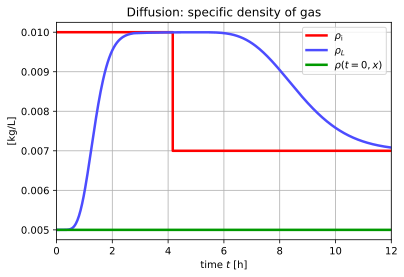

In [28]:
plt.plot(tm/60/60,rhoi,linewidth=LW1,color=Cr1,label=r"$\rho_{\mathrm{i}}$")
plt.plot(tm/60/60,rhoL,linewidth=LW1,color=Cb1,label=r"$\rho_L$")
plt.plot(tm/60/60,rho0,linewidth=LW1,color=Cg1,label=r"$\rho(t=0,x)$")
plt.title(r"Diffusion: specific density of gas")
plt.xlabel(r"time $t$ [h]")
plt.ylabel(r"[kg/L]")
plt.grid()
plt.xlim(0,12)
plt.legend()
if createPDF:
    figfile = "diffusionGasLiquidSim-1.pdf"
    plt.savefig(figpath+figfile)

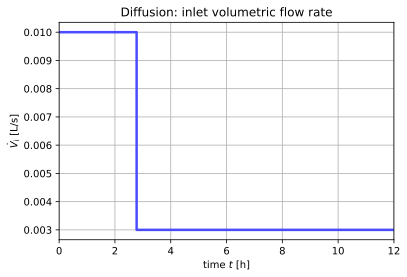

In [29]:
plt.plot(tm/60/60,Vdi,linewidth=LW1,color=Cb1,label=r"$\dot{V}_{\mathrm{i}}$")
plt.title(r"Diffusion: inlet volumetric flow rate")
plt.xlabel(r"time $t$ [h]")
plt.ylabel(r"$\dot{V}_{\mathrm{i}}$ [L/s]")
plt.grid()
plt.xlim(0,12)
if createPDF:
    figfile = "diffusionGasLiquidSim-2.pdf"
    plt.savefig(figpath+figfile)

In [30]:
rho1,rho2,rho3,rho4 = dGL.getSolutions("dgl.rho[1]","dgl.rho[2]","dgl.rho[3]","dgl.rho[4]")
rho5,rho6,rho7,rho8 = dGL.getSolutions("dgl.rho[5]","dgl.rho[6]","dgl.rho[7]","dgl.rho[8]")
rho9 = dGL.getSolutions("dgl.rho[9]")

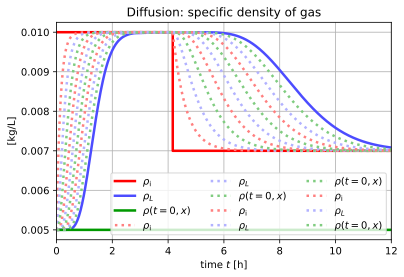

In [31]:
plt.plot(tm/60/60,rhoi,linewidth=LW1,color=Cr1,label=r"$\rho_{\mathrm{i}}$")
plt.plot(tm/60/60,rhoL,linewidth=LW1,color=Cb1,label=r"$\rho_L$")
plt.plot(tm/60/60,rho0,linewidth=LW1,color=Cg1,label=r"$\rho(t=0,x)$")
plt.plot(tm/60/60,rho1,linewidth=LW1,color=Cr2,linestyle=LS2,label=r"$\rho_{\mathrm{i}}$")
plt.plot(tm/60/60,rho2,linewidth=LW1,color=Cb2,linestyle=LS2,label=r"$\rho_L$")
plt.plot(tm/60/60,rho3,linewidth=LW1,color=Cg2,linestyle=LS2,label=r"$\rho(t=0,x)$")
plt.plot(tm/60/60,rho4,linewidth=LW1,color=Cr2,linestyle=LS2,label=r"$\rho_{\mathrm{i}}$")
plt.plot(tm/60/60,rho5,linewidth=LW1,color=Cb2,linestyle=LS2,label=r"$\rho_L$")
plt.plot(tm/60/60,rho6,linewidth=LW1,color=Cg2,linestyle=LS2,label=r"$\rho(t=0,x)$")
plt.plot(tm/60/60,rho7,linewidth=LW1,color=Cr2,linestyle=LS2,label=r"$\rho_{\mathrm{i}}$")
plt.plot(tm/60/60,rho8,linewidth=LW1,color=Cb2,linestyle=LS2,label=r"$\rho_L$")
plt.plot(tm/60/60,rho9,linewidth=LW1,color=Cg2,linestyle=LS2,label=r"$\rho(t=0,x)$")
plt.title(r"Diffusion: specific density of gas")
plt.xlabel(r"time $t$ [h]")
plt.ylabel(r"[kg/L]")
plt.grid()
plt.xlim(0,12)
plt.legend(ncol=3)
if createPDF:
    figfile = "diffusionGasLiquidSim-3.pdf"
    plt.savefig(figpath+figfile)

In [32]:
J1,J2,J3,J4,J5 = dGL.getSolutions("dgl.J[1]","dgl.J[2]","dgl.J[3]","dgl.J[4]","dgl.J[5]")
J6,J7,J8,J9,J10 = dGL.getSolutions("dgl.J[6]","dgl.J[7]","dgl.J[8]","dgl.J[9]","dgl.J[10]")

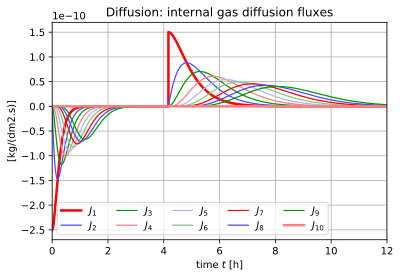

In [33]:
plt.plot(tm/60/60,J1,linewidth=LW1,color=Cr1,label=r"$J_1$")
plt.plot(tm/60/60,J2,linewidth=LW2,color=Cb1,label=r"$J_2$")
plt.plot(tm/60/60,J3,linewidth=LW2,color=Cg1,label=r"$J_3$")
plt.plot(tm/60/60,J4,linewidth=LW2,color=Cr2,label=r"$J_4$")
plt.plot(tm/60/60,J5,linewidth=LW2,color=Cb2,label=r"$J_5$")
plt.plot(tm/60/60,J6,linewidth=LW2,color=Cg2,label=r"$J_6$")
plt.plot(tm/60/60,J7,linewidth=LW2,color=Cr1,label=r"$J_7$")
plt.plot(tm/60/60,J8,linewidth=LW2,color=Cb1,label=r"$J_8$")
plt.plot(tm/60/60,J9,linewidth=LW2,color=Cg1,label=r"$J_9$")
plt.plot(tm/60/60,J10,linewidth=LW1,color=Cr2,label=r"$J_{10}$")
plt.title(r"Diffusion: internal gas diffusion fluxes")
plt.xlabel(r"time $t$ [h]")
plt.ylabel(r"[kg/(dm2.s)]")
plt.grid()
plt.xlim(0,12)
plt.legend(ncol=5)
if createPDF:
    figfile = "diffusionGasLiquidSim-4.pdf"
    plt.savefig(figpath+figfile)

In [34]:
dGL = ModelicaSystem("DiffusionGasLiquid.mo","DiffusionGasLiquid.SimCompareDiffusionGasLiquid")

2017-08-09 10:59:49,853 - OMPython - INFO - OMC Server is up and running at file:////tmp/openmodelica.dietmarw.port.007f0149ebd64e758de935cfa1ca9e02


Expected end of text (at char 125), (line:2, col:56)


In [35]:
dGL.setSimulationOptions(stopTime=60*60*12,stepSize=100)
dGL.simulate()
tm,rhoL10,rhoL30,rhoL90,rhoL300 = dGL.getSolutions("time","_rhoL10","_rhoL30","_rhoL90","_rhoL300")

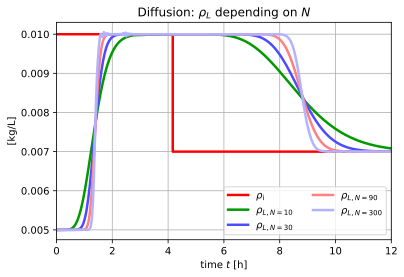

In [36]:
plt.plot(tm/60/60,rhoi,linewidth=LW1,color=Cr1,label=r"$\rho_{\mathrm{i}}$")
plt.plot(tm/60/60,rhoL10,linewidth=LW1,color=Cg1,label=r"$\rho_{L,N=10}$")
plt.plot(tm/60/60,rhoL30,linewidth=LW1,color=Cb1,label=r"$\rho_{L,N=30}$")
plt.plot(tm/60/60,rhoL90,linewidth=LW1,color=Cr2,label=r"$\rho_{L,N=90}$")
plt.plot(tm/60/60,rhoL300,linewidth=LW1,color=Cb2,label=r"$\rho_{L,N=300}$")
plt.title(r"Diffusion: $\rho_L$ depending on $N$")
plt.xlabel(r"time $t$ [h]")
plt.ylabel(r"[kg/L]")
plt.grid()
plt.xlim(0,12)
plt.legend(ncol=2)
if createPDF:
    figfile = "diffusionGasLiquidSim-5.pdf"
    plt.savefig(figpath+figfile)

In [37]:
rhoLD1,rhoLD3e3 = dGL.getSolutions("_rhoLD1","_rhoLD3e3")

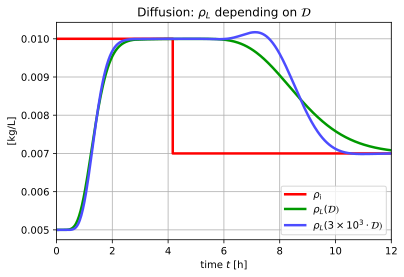

In [38]:
plt.plot(tm/60/60,rhoi,linewidth=LW1,color=Cr1,label=r"$\rho_{\mathrm{i}}$")
plt.plot(tm/60/60,rhoLD1,linewidth=LW1,color=Cg1,label=r"$\rho_{L}(\cal{D})$")
plt.plot(tm/60/60,rhoLD3e3,linewidth=LW1,color=Cb1,label=r"$\rho_{L}(3\times 10^3\cdot \cal{D})$")
plt.title(r"Diffusion: $\rho_L$ depending on $\cal{D}$")
plt.xlabel(r"time $t$ [h]")
plt.ylabel(r"[kg/L]")
plt.grid()
plt.xlim(0,12)
plt.legend()
if createPDF:
    figfile = "diffusionGasLiquidSim-6.pdf"
    plt.savefig(figpath+figfile)